### For fun: Análise Exploratória do Futebol Brasileiro

Fiz uma pequena análise exploratória de alguns dados do futebol brasileiro desde a era dos pontos corridos até 2020.
Não há nada muito sofisticado, sendo apenas uma análise de médias e gráficos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('futbolbrasileno.csv')
print(df.head())
print(df.info())

   ano_campeonato        data horario  rodada  \
0            2003  2003-03-29   08:00       1   
1            2003  2003-03-29   08:00       1   
2            2003  2003-03-30   09:00       1   
3            2003  2003-03-30   09:00       1   
4            2003  2003-03-30   09:00       1   

                              estadio arbitro  publico  publico_max  \
0  Estádio Brinco de Ouro da Princesa     NaN      NaN          NaN   
1                    Arena da Baixada     NaN      NaN          NaN   
2      Estádio Jornalista Mário Filho     NaN      NaN          NaN   
3           Estádio de Hailé Pinheiro     NaN      NaN          NaN   
4                   Estádio Beira-Rio     NaN      NaN          NaN   

        time_man       time_vis  ... chutes_bola_parada_man  \
0        Guarani  Vasco da Gama  ...                    NaN   
1    Atlético-PR         Grêmio  ...                    NaN   
2       Flamengo    Coritiba FC  ...                    NaN   
3       Goiás EC    Paysan

#### 1. Desenvolvimento do futebol brasileiro ao longo dos anos

Vamos verificar visualmente se há alguma tendência de queda ou aumento na média de gols ao longo dos anos.
Algo que é possível verificar de cara é que há mais partidas jogadas entre os anos de 2003 e 2005, devido ao Campeonato Brasileiro possuir mais rodadas (46 em 2003 e 2004 e 42 em 2005, até chegar a 38 rodadas, número que permanece até hoje).

In [3]:
# média de gols por ano

# verificar a quantidade de jogos por ano
ano = df['ano_campeonato'].value_counts().sort_index()
print(ano)

2003    456
2004    456
2005    418
2006    380
2007    380
2008    380
2009    380
2010    380
2011    380
2012    380
2013    380
2014    380
2015    380
2016    380
2017    380
2018    380
2019    380
2020    380
Name: ano_campeonato, dtype: int64


In [4]:
# calcular total de gols

df['total_gols'] = df['gols_man'] + df['gols_vis']
print(df['total_gols'].head())

0    6.0
1    2.0
2    2.0
3    4.0
4    2.0
Name: total_gols, dtype: float64


In [5]:
# calculo da media de gols

media = df.groupby(['ano_campeonato']).mean()
print(media['total_gols'].head())

ano_campeonato
2003    2.828947
2004    2.756579
2005    3.148325
2006    2.713158
2007    2.755263
Name: total_gols, dtype: float64


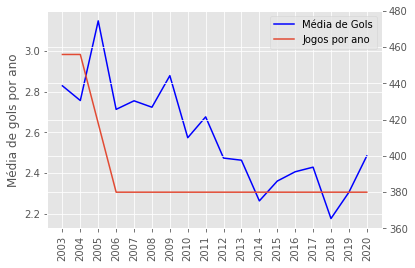

In [6]:
# plotar o grafico ano x media gols

plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(media.index, media['total_gols'], color = 'blue', label='Média de Gols')
ax.set_ylabel('Média de gols por ano')
plt.xticks(np.arange(min(media.index), max(media.index)+1, 1.0), rotation=90)

ax2 = ax.twinx()
ax2.plot(ano, label='Jogos por ano')
plt.ylim(360, 480)

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.show()

#### 2. Há alguma vantagem em jogar em casa?

In [7]:
# comparação das médias de gol 

print(df['gols_man'].describe())
print(df['gols_vis'].describe())

count    7029.000000
mean        1.558970
std         1.232089
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: gols_man, dtype: float64
count    7029.000000
mean        1.027458
std         1.028320
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: gols_vis, dtype: float64


In [8]:
# a média de gols do mandante é maior que a do visitante. Entretanto, o que importa são as vitórias do mandante

df['ganhador'] = np.where(df['gols_man'] > df['gols_vis'], 'Mandante', 
                          np.where(df['gols_man'] == df['gols_vis'], 'Empate', 'Visitante'))
print(df['ganhador'].head())
print(df['ganhador'].value_counts()) # podemos concluir que há vantagem do mandante

0    Mandante
1    Mandante
2      Empate
3      Empate
4      Empate
Name: ganhador, dtype: object
Mandante     3522
Empate       1855
Visitante    1653
Name: ganhador, dtype: int64


#### 3. Quais foram as maiores goleadas dentro e fora de casa?

In [9]:
# Determinar as maiores goleadas dentro e fora de casa

maior_qtd_gols_casa = df.iloc[df['gols_man'].idxmax()]
maior_qtd_gols_vis = df.iloc[df['gols_vis'].idxmax()]
print(maior_qtd_gols_casa.loc[['ano_campeonato','time_man','time_vis','gols_man','gols_vis']])
print(maior_qtd_gols_vis.loc[['ano_campeonato','time_man','time_vis','gols_man','gols_vis']])

ano_campeonato         2003
time_man           Goiás EC
time_vis          Juventude
gols_man                  7
gols_vis                  0
Name: 65, dtype: object
ano_campeonato         2003
time_man           EC Bahia
time_vis          Santos FC
gols_man                  4
gols_vis                  7
Name: 450, dtype: object


In [10]:
# qual foi a partida com mais gols?

maior_qtd_gols = df.iloc[df['total_gols'].idxmax()]
print(maior_qtd_gols.loc[['ano_campeonato','time_man','time_vis','gols_man','gols_vis','total_gols']])

ano_campeonato         2003
time_man           EC Bahia
time_vis          Santos FC
gols_man                  4
gols_vis                  7
total_gols               11
Name: 450, dtype: object


#### 4. Quantos clubes diferentes já jogaram a Série A?

In [11]:
# Aqui separamos os valores únicos de clubes e concatenamos em uma única lista

mandante = pd.unique(df['time_man'])
visitante = pd.unique(df['time_vis'])

clubes = pd.unique(np.concatenate((mandante, visitante)))
print(len(clubes))
print(clubes)

44
['Guarani' 'Atlético-PR' 'Flamengo' 'Goiás EC' 'Internacional'
 'Criciúma EC' 'Juventude' 'Fortaleza' 'Cruzeiro' 'EC Vitória' 'Santos FC'
 'Corinthians' 'Fluminense' 'Atlético-MG' 'Coritiba FC' 'Grêmio'
 'EC Bahia' 'Figueirense FC' 'Paysandu SC' 'Ponte Preta' 'Paraná'
 'São Caetano' 'São Paulo' 'Vasco da Gama' 'Botafogo' 'Palmeiras'
 'Brasiliense-DF' 'Santa Cruz' 'América-RN' 'Sport Recife' 'Náutico'
 'Ipatinga FC' 'Portuguesa' 'Avaí FC' 'Santo André' 'Barueri'
 'Atlético-GO' 'Ceará SC' 'América-MG' 'Chapecoense' 'Joinville-SC'
 'Athletico-PR' 'CSA' 'RB Bragantino']


#### 5. Qual foi o clube que mais venceu?

In [12]:
# mesmo passo do 3; mas agora retornamos uma coluna com o nome do time vencedor

df['time_ganhador'] = np.where(df['gols_man'] > df['gols_vis'], df['time_man'], 
                          np.where(df['gols_man'] == df['gols_vis'], 'Empate', df['time_vis']))
print(df['time_ganhador'].head())

0        Guarani
1    Atlético-PR
2         Empate
3         Empate
4         Empate
Name: time_ganhador, dtype: object


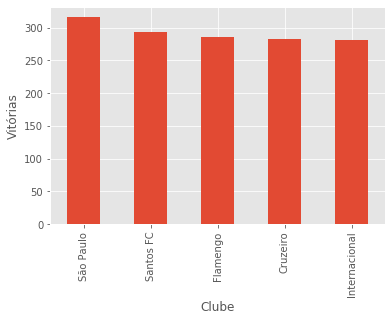

In [13]:
# criamos uma variável ganhadores com a quantidade de vitórias de cada clube e plotamos

ganhadores = df['time_ganhador'].value_counts()
ax2 = ganhadores[1:6].plot(kind='bar') # não incluí o index 0 pois este é o empate -o maior ganhador de todos, com 1855!-
ax2.set_xlabel('Clube')
ax2.set_ylabel('Vitórias')

plt.show()

#### 6. Qual foi o clube que fez mais gols (casa e fora) e qual tomou mais?

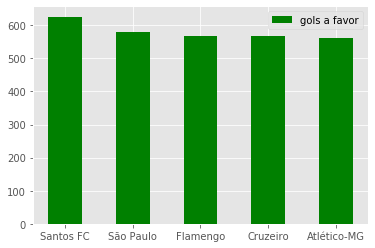

In [14]:
# aqui criamos um dataframe vazio para incluir a soma de gols que cada clube fez e tomou

summary = pd.DataFrame(columns = ['clube', 'gols_pró', 'gols_contra'])

for clube in clubes:
    gols_pro = df.loc[df['time_man'] == clube, 'gols_man'].sum()
    + df.loc[df['time_vis'] == clube, 'gols_vis'].sum()
    
    gols_contra = df.loc[df['time_man'] == clube, 'gols_vis'].sum()
    + df.loc[df['time_vis'] == clube, 'gols_man'].sum()
    
    summary = summary.append({'clube' : clube, 'gols_pró' : gols_pro, 'gols_contra' : gols_contra}, ignore_index=True)
# colocamos o indice como clube e organizamos os valores por ordem descendente
summary = summary.set_index('clube').sort_values(by = ['gols_pró'], ascending = False)
plt.bar(summary.index[0:5], summary['gols_pró'][0:5], label='gols a favor', width = 0.5, color = 'green')
plt.legend()
plt.show()

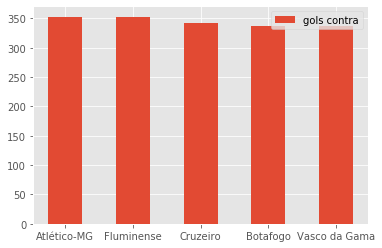

In [15]:
# mesmo processo anterior, agora com os gols contra
summary = summary.sort_values(by = ['gols_contra'], ascending = False)
plt.bar(summary.index[0:5], summary['gols_contra'][0:5], label='gols contra', width = 0.5)
plt.legend(loc='upper right')
plt.show()

#### 7. Conclusão

Este projeto foi bem divertido de realizar. Não tem nenhuma técnica robusta de estatística mas foi possível inferir algumas coisas a partir dos gráficos como: o maior vencedor de partidas é o São Paulo FC, o time que mais fez gols foi o Santos e o que mais tomou foi o Atlético MG. No futuro com maior conhecimento e mais ferramentas espero trabalhar novamente com estes dados e extrair análises mais ricas e complexas.

#### 8. Fonte 

https://basedosdados.org/dataset/mundo-transfermarkt-competicoes